In [1]:
# install PyArabic library for Arabic preprocessing
!pip install PyArabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Standard libraries imports
import gdown
import requests
import numpy as np
import pandas as pd
from scipy import stats
import pyarabic.araby as araby

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
final_unique_char = ['#',
                      'أ',
                      'ف',
                      'ض',
                      'ل',
                      'ا',
                      'ص',
                      'ة',
                      'ب',
                      'ع',
                      'د',
                      'ر',
                      'ي',
                      'و',
                      'ج',
                      'ه',
                      'م',
                      'ث',
                      'ت',
                      'ذ',
                      'ك',
                      'ح',
                      'ى',
                      'ق',
                      'ط',
                      'س',
                      'ش',
                      'ن',
                      'خ',
                      'غ',
                      'ظ',
                      'آ',
                      'إ',
                      'ء',
                      'ز',
                      'ئ',
                      'ؤ',
                      '|']

# list of all Arabic characters
print('Number of Arabic Characters:', len(final_unique_char))

# character to index dictionary
char_to_index = dict((char, index+3) for (index, char) in enumerate(final_unique_char))
# index to character dictionary
index_to_char=  dict((index+3, char) for (index, char) in enumerate(final_unique_char))

char_to_index['$'] = 0 # pad
char_to_index['#'] = 1 # separator
char_to_index['_'] = 2 # mask


index_to_char[0] = '$' # pad
index_to_char[1] = '#' # separator
index_to_char[2] = '_' # mask

Number of Arabic Characters: 38


In [6]:
# read the competition training dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/sigmorphon/2022InflectionST/main/part2/ara_1000.train', sep='\t', header=None)
# take only the first and second columns which
# contain the sigular and plural forms
train_df = train_df.iloc[:, :2]
# rename the columns
train_df.columns = ['singular', 'plural']
# remove the Arabic diacritics from each column
for col in train_df.columns:
  train_df[col] = train_df[col].apply(lambda x: araby.strip_diacritics(x))

# fetch the top 10 rows
train_df.head(10)

,singular,plural
0,ساحة,ساحات
1,أمر,أمور
2,أمة,أمم
3,جلسة,جلسات
4,ٱتهام,اتهامات
5,وزارة,وزارات
6,ملفة,ملفات
7,مسؤول,مسؤولين
8,خط,خطوط
9,ولاية,ولايات


In [7]:
# read the competition validation dataset
valid_df = pd.read_csv('https://raw.githubusercontent.com/sigmorphon/2022InflectionST/main/part2/ara.dev', sep='\t', header=None)
# take only the first and second columns which
# contain the sigular and plural forms
valid_df = valid_df.iloc[:, :2]
# rename the columns
valid_df.columns = ['singular', 'plural']
# remove the Arabic diacritics from each column
for col in valid_df.columns:
  valid_df[col] = valid_df[col].apply(lambda x: araby.strip_diacritics(x))

# fetch the top 10 rows
valid_df.head(10)

,singular,plural
0,تهمة,تهم
1,مانع,موانع
2,بعد,أبعاد
3,توظيف,توظيفات
4,خطر,أخطار
5,مسلك,مسالك
6,متحالف,متحالفين
7,فار,فارين
8,بحث,أبحاث
9,نزاع,نزاعات


In [8]:
# read the competition test dataset
test_df = pd.read_csv('https://raw.githubusercontent.com/sigmorphon/2022InflectionST/main/part2/ara.gold', sep='\t', header=None)
# take only the first and second columns which
# contain the sigular and plural forms
test_df = test_df.iloc[:, :2]
# rename the columns
test_df.columns = ['singular', 'plural']
# remove the Arabic diacritics from each column
for col in test_df.columns:
  test_df[col] = test_df[col].apply(lambda x: araby.strip_diacritics(x))

# fetch the top 10 rows
test_df.head(10)

,singular,plural
0,طربيد,طوربيدات
1,مولود,مواليد
2,ضروري,ضروريات
3,معني,معنيين
4,جدار,جدران
5,كوليس,كواليس
6,حديقة,حدائق
7,حياة,حيوات
8,دمية,دمى
9,تعاقد,تعاقدات


In [9]:
# load the predictions
valid_urls = ['https://drive.google.com/file/d/1jZVF6TU8VsxdRf640lLBJCclASgSaugr/view?usp=sharing',
              'https://drive.google.com/file/d/1-NSTbyIFYyRclO-Ap33euNdP5eGMUmkx/view?usp=sharing',
              'https://drive.google.com/file/d/1-0nkMgfR7KM8t152TusbZAmbBl8ZsYhy/view?usp=sharing',
              'https://drive.google.com/file/d/1-3aPnNJugZdszfQ8_GiWhvo1QZcY9ha0/view?usp=sharing',
              'https://drive.google.com/file/d/1-9zBJfwe8INRB2L88gb10tBw_uNvl4dt/view?usp=sharing',
              'https://drive.google.com/file/d/1-UmFAZNH09M1oRPlkYJDjgNTwj6hdKJ4/view?usp=sharing']

valid_preds = dict()
for i in range(6):
  url = 'https://drive.google.com/uc?export=download&id=' + valid_urls[i].split('/')[-2]
  output = 'array.npy'
  gdown.download(url, output, quiet=False)
  if i < 3:
    valid_preds[f'fused_case_{i+1}'] = np.load('array.npy')
  else:
    valid_preds[f'direct_case_{i-2}'] = np.load('array.npy')

Downloading...
From: https://drive.google.com/uc?export=download&id=1jZVF6TU8VsxdRf640lLBJCclASgSaugr
To: /content/array.npy
100%|██████████| 30.3k/30.3k [00:00<00:00, 15.1MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-NSTbyIFYyRclO-Ap33euNdP5eGMUmkx
To: /content/array.npy
100%|██████████| 30.3k/30.3k [00:00<00:00, 20.1MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-0nkMgfR7KM8t152TusbZAmbBl8ZsYhy
To: /content/array.npy
100%|██████████| 30.3k/30.3k [00:00<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-3aPnNJugZdszfQ8_GiWhvo1QZcY9ha0
To: /content/array.npy
100%|██████████| 30.3k/30.3k [00:00<00:00, 7.50MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-9zBJfwe8INRB2L88gb10tBw_uNvl4dt
To: /content/array.npy
100%|██████████| 30.3k/30.3k [00:00<00:00, 26.8MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-UmFAZNH09M1oRPlkYJDjgNTwj6hdKJ4
To: /con

In [10]:
# load the predictions
test_urls  = ['https://drive.google.com/file/d/1-7u5Vah7l-8YMmq2zlXKG0W24pxW5VoL/view?usp=sharing',
              'https://drive.google.com/file/d/1-ODA83AELLp0GynjjVlPc1dKcsqplgy6/view?usp=sharing',
              'https://drive.google.com/file/d/1-ODA83AELLp0GynjjVlPc1dKcsqplgy6/view?usp=sharing',
              'https://drive.google.com/file/d/1-5qFdu8HPv7fhLzXtFlbIGMqE8TEY8nM/view?usp=sharing',
              'https://drive.google.com/file/d/1-LkUEcnklNrBhTfwXsSpoXOxPWPOqVmh/view?usp=sharing',
              'https://drive.google.com/file/d/1-VJ7OBYqcndGAkPK6elD0nr4uTF9o1YA/view?usp=sharing']

test_preds = dict()
for i in range(6):
  url = 'https://drive.google.com/uc?export=download&id=' + test_urls[i].split('/')[-2]
  output = 'array.npy'
  gdown.download(url, output, quiet=False)
  if i < 3:
    test_preds[f'fused_case_{i+1}'] = np.load('array.npy')
  else:
    test_preds[f'direct_case_{i-2}'] = np.load('array.npy')

Downloading...
From: https://drive.google.com/uc?export=download&id=1-7u5Vah7l-8YMmq2zlXKG0W24pxW5VoL
To: /content/array.npy
100%|██████████| 52.9k/52.9k [00:00<00:00, 75.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-ODA83AELLp0GynjjVlPc1dKcsqplgy6
To: /content/array.npy
100%|██████████| 52.9k/52.9k [00:00<00:00, 22.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-ODA83AELLp0GynjjVlPc1dKcsqplgy6
To: /content/array.npy
100%|██████████| 52.9k/52.9k [00:00<00:00, 53.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-5qFdu8HPv7fhLzXtFlbIGMqE8TEY8nM
To: /content/array.npy
100%|██████████| 52.9k/52.9k [00:00<00:00, 57.1MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-LkUEcnklNrBhTfwXsSpoXOxPWPOqVmh
To: /content/array.npy
100%|██████████| 52.9k/52.9k [00:00<00:00, 12.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-VJ7OBYqcndGAkPK6elD0nr4uTF9o1YA
To: /con

# Helper Functions

In [11]:
def indexes_to_word(example):
  '''
  Args: an array of indexes
  Returns: a list of characters
  '''
  example = example.tolist()
  list_of_chars = [index_to_char[idx] for idx in example]
  return list_of_chars

In [12]:
def final_prediction_as_chars(index, split, fused, case, return_gold=False):
  '''
  Args: index in the preditions array, int
  Returns: a list of characters of the predictions from the start to the first 's' character
  '''
  if split == 'test':
    split_preds = test_preds
  elif split == 'valid':
    split_preds = valid_preds

  if fused:
    arch = 'fused'
  else:
    arch = 'direct'

  key = arch + '_' + 'case_' + str(case)
  preds = split_preds[key]

  # extract the predictions
  example = preds[index]
  # flip the predictions (Arabic)
  flipped_example = np.flip(example)
  try:
    # find the position of the first separator index, which is 1
    first_separator_index = np.where(flipped_example == 1)[0][0]
    # limit the returned sequence to the first separator
    predicted_flipped_example = flipped_example[:first_separator_index]
  except:
    predicted_flipped_example = flipped_example
  # convert the array into a list
  example = np.int32(predicted_flipped_example).tolist()
  # convert indexes into characters
  pred_chars = [index_to_char[i] for i in example]
  # if gold is required, return it
  if split == 'test':
    if return_gold:
      gold = list(test_df.iloc[index, 1])
      return pred_chars, gold
    return pred_chars

  elif split == 'valid':
    if return_gold:
      gold = list(valid_df.iloc[index, 1])
      return pred_chars, gold
    return pred_chars

In [13]:
def final_prediction_as_indexes(index, split, fused, case, return_gold=False):
  '''
  Args: index in the preditions array, int
  Returns: a list of indexes of the predictions from the start to the index of the first 's' character
  '''
  if split == 'test':
    split_preds = test_preds
  elif split == 'valid':
    split_preds = valid_preds

  if fused:
    arch = 'fused'
  else:
    arch = 'direct'

  key = arch + '_' + 'case_' + str(case)
  preds = split_preds[key]

  # extract the predictions
  example = preds[index]
  # flip the predictions (Arabic)
  flipped_example = np.flip(example)
  try:
    # find the position of the first separator index, which is 1
    first_separator_index = np.where(flipped_example == 1)[0][0]
    # limit the returned sequence to the first separator
    predicted_flipped_example = flipped_example[:first_separator_index]
  except:
    predicted_flipped_example = flipped_example
  # convert the array into a list
  pred_indexes = np.int32(predicted_flipped_example).tolist()
  # if gold is required, return it
  if split == 'test':
    if return_gold:
      gold = [char_to_index[char] for char in list(test_df.iloc[index, 1])]
      return pred_indexes, gold
    return pred_indexes

  elif split == 'valid':
    if return_gold:
      gold = [char_to_index[char] for char in list(valid_df.iloc[index, 1])]
      return pred_indexes, gold
    return pred_indexes

In [14]:
def arabic_leven_dis(gold, pred, return_matrix=False):
  '''
  Levenshtein distance
  Args:
    gold: list of indexes of the gold characters
    pred: list of indexes of the predicted characters
  Returns:
    Levenshtein distance
  '''

  # construct a matrix of the correct size
  sol = np.zeros((len(pred), len(gold)))

  # first row and column
  sol[0, :] = np.flip([i for i in range(len(gold))])
  sol[:, -1] = [i for i in range(len(pred))]

  # fill in the rest
  # through every column
  for c in reversed(range(len(gold) - 1)):
    # through every row
    for r in range(1, len(pred)):

      # in case not the same corresponding letters, take the minimum value of the above right corner three values (Arabic) + 1 
      if gold[c] != pred[-(r+1)]:
        sol[r, c] = min(sol[r-1, c+1], sol[r-1, c], sol[r, c+1]) + 1
      # in case the corresponding letters are the same, take the upper diagonal value
      else:
        sol[r, c] = sol[r-1, c+1]

  # if the full matrix is required
  if return_matrix: 
    return sol
  # if only the minimum number of edits is required
  return sol[-1, 0]

In [15]:
def distances_arr(split, fused, case):
  # construct a distances list
  distances = []
  # iterate over each plural example in the validation set
  if split == 'test':
    df = test_df.copy()
  elif split == 'valid':
    df = valid_df.copy()
  for i in range(len(df)):
    # extract the final predicted indexes alongside with the ground truth ones
    pred, gold = final_prediction_as_indexes(i, split, fused, case, True)
    gold = gold + [-1] # add -1 for the '#' in the Levenshtein distance
    pred = pred + [-1] # add -1 for the '#' in the Levenshtein distance
    # calculate the minimum edits required
    dist = arabic_leven_dis(gold, pred)
    # append the distance to the distances list
    distances.append(dist)

  # convert the distances list into a NumPy array
  distances = np.array(distances)
  return distances

In [16]:
# print the statistics of the distances array
distances = distances_arr(split='valid', fused=True, case=1)
statistics = stats.describe(distances)
statistics

DescribeResult(nobs=343, minmax=(0.0, 5.0), mean=1.5568513119533527, variance=1.8966122789968118, skewness=0.2580563204394911, kurtosis=-1.122904544312929)

In [17]:
def pure_count_plot(distances, loc, title):
  plt.subplot(2, 6, loc)
  # plot a figure showing the frequencies of each distance value
  sns.countplot(np.int32(distances), palette="colorblind")
  # plt.box(False)
  plt.xlabel('Levenshtein Distance')
  plt.ylabel('Frequency')
  plt.title(title)
  plt.grid(linestyle='dashed', alpha=1, axis='y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

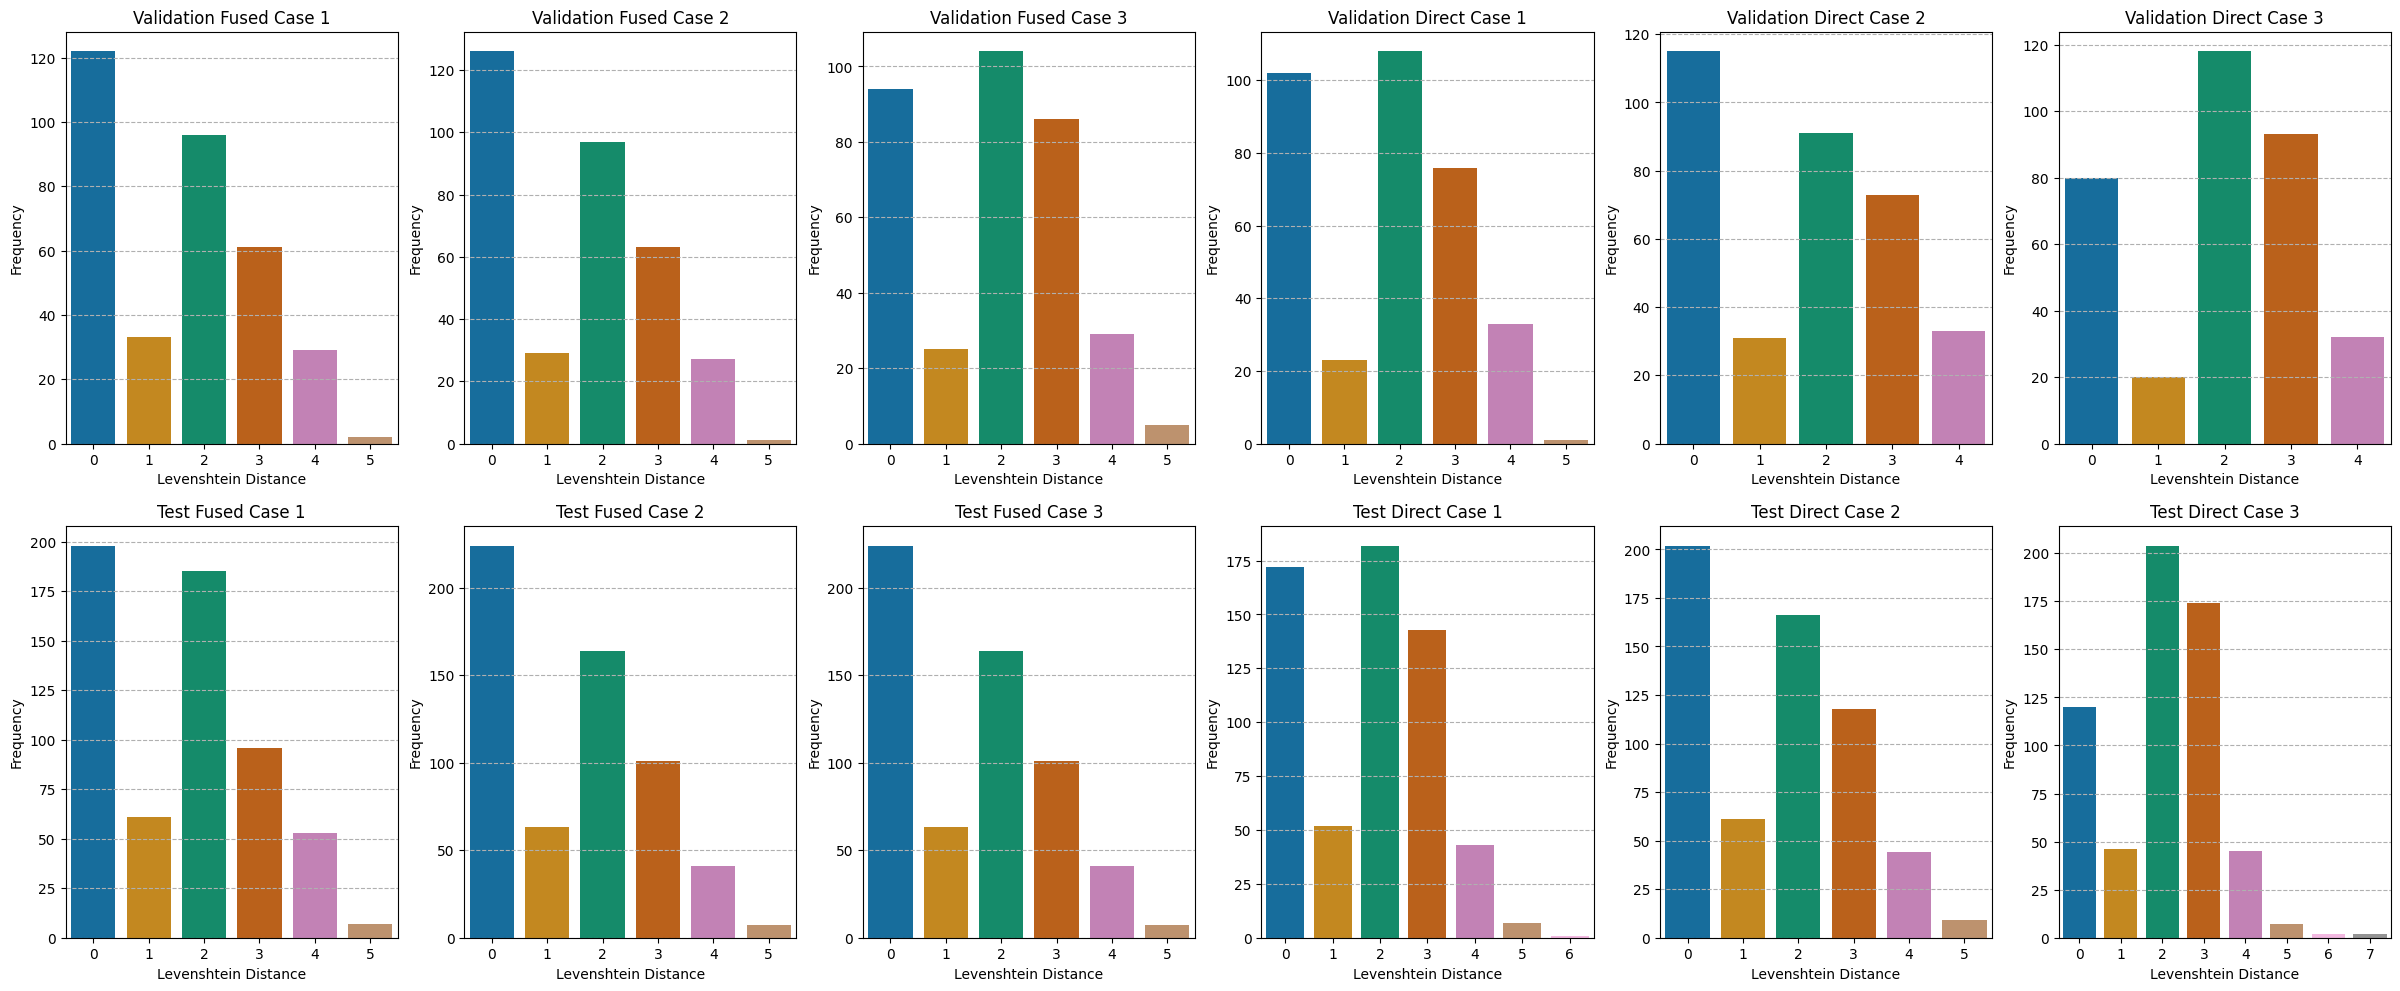

In [18]:
plt.figure(figsize=(30, 12), dpi=100)

distances = distances_arr(split='valid', fused=True, case=1)
pure_count_plot(distances, 1, 'Validation Fused Case 1')

distances = distances_arr(split='valid', fused=True, case=2)
pure_count_plot(distances, 2, 'Validation Fused Case 2')

distances = distances_arr(split='valid', fused=True, case=3)
pure_count_plot(distances, 3, 'Validation Fused Case 3')

distances = distances_arr(split='valid', fused=False, case=1)
pure_count_plot(distances, 4, 'Validation Direct Case 1')

distances = distances_arr(split='valid', fused=False, case=2)
pure_count_plot(distances, 5, 'Validation Direct Case 2')

distances = distances_arr(split='valid', fused=False, case=3)
pure_count_plot(distances, 6, 'Validation Direct Case 3')


distances = distances_arr(split='test', fused=True, case=1)
pure_count_plot(distances, 7, 'Test Fused Case 1')

distances = distances_arr(split='test', fused=True, case=2)
pure_count_plot(distances, 8, 'Test Fused Case 2')

distances = distances_arr(split='test', fused=True, case=3)
pure_count_plot(distances, 9, 'Test Fused Case 3')

distances = distances_arr(split='test', fused=False, case=1)
pure_count_plot(distances, 10, 'Test Direct Case 1')

distances = distances_arr(split='test', fused=False, case=2)
pure_count_plot(distances, 11, 'Test Direct Case 2')

distances = distances_arr(split='test', fused=False, case=3)
pure_count_plot(distances, 12, 'Test Direct Case 3')

plt.savefig('Validation-Test-Plots.png', dpi=100, bbox_inches='tight')
plt.show()

In [19]:
valid_preds['fused_case_2']

array([[21.,  1.,  1., ..., 19., 18., 21.],
       [ 1.,  1.,  1., ..., 30.,  8., 19.],
       [ 1.,  1.,  1., ..., 13., 12., 11.],
       ...,
       [ 1.,  1.,  1., ...,  8., 30., 11.],
       [ 1.,  1.,  1., ..., 30., 17.,  4.],
       [ 1.,  1.,  1., ..., 21., 24.,  8.]])

In [20]:
# the whole dataset
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(valid_df.iloc[:, -1].values.tolist()):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 146
Number of masculine examples: 50
Number of takseer examples: 147


In [21]:
# the whole dataset
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(test_df.iloc[:, -1].values.tolist()):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 256
Number of masculine examples: 64
Number of takseer examples: 280


# Intensive Study

## Validatoin Set

In [22]:
# print(count of each Levenshtein distance)
dists = np.unique(np.int32(distances_arr(split='valid', fused=True, case=2)), return_counts=True)[0]
couts = np.unique(np.int32(distances_arr(split='valid', fused=True, case=2)), return_counts=True)[1]
display(pd.DataFrame({'Distance': dists, 'Counts': couts}))

,Distance,Counts
0,0,126
1,1,29
2,2,97
3,3,63
4,4,27
5,5,1


In [23]:
distances = distances_arr(split='valid', fused=True, case=2)

In [24]:
# group by each distance value
zero_distance_indexes = np.where(distances==0)[0]
one_distance_indexes = np.where(distances==1)[0]
two_distance_indexes = np.where(distances==2)[0]
three_distance_indexes = np.where(distances==3)[0]
four_distance_indexes = np.where(distances==4)[0]
five_distance_indexes = np.where(distances==5)[0]

## Zero Levenshtein Distance (Perfect Match) 

In [25]:
# extract a list of the plural forms
zero_distance_plural = valid_df.iloc[zero_distance_indexes, -1].values.tolist()

In [26]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(zero_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 80
Number of masculine examples: 16
Number of takseer examples: 30


In [27]:
# retrieving takseer examples
takseer_examples = [zero_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [28]:
# retrieving feminine examples
feminine_examples = [zero_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [29]:
# retrieving masculine examples
masculine_examples = [zero_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

مستخدمين is in training set
**************************************************
1 out of 16 words is/are in the training set


## One Levenshtein Distance

In [30]:
# extract a list of the plural forms
one_distance_plural = valid_df.iloc[one_distance_indexes, -1].values.tolist()

In [31]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(one_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 10
Number of masculine examples: 9
Number of takseer examples: 10


In [32]:
# retrieving takseer examples
takseer_examples = [one_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [33]:
# retrieving feminine examples
feminine_examples = [one_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [34]:
# retrieving masculine examples
masculine_examples = [one_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Two Levenshtein Distance

In [35]:
# extract a list of the plural forms
two_distance_plural = valid_df.iloc[two_distance_indexes, -1].values.tolist()

In [36]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(two_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 34
Number of masculine examples: 15
Number of takseer examples: 48


In [37]:
# retrieving takseer examples
takseer_examples = [two_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [38]:
# retrieving feminine examples
feminine_examples = [two_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

مشاركات is in training set
مجريات is in training set
مستوطنات is in training set
**************************************************
3 out of 34 words is/are in the training set


In [39]:
# retrieving masculine examples
masculine_examples = [two_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Three Levenshtein Distance

In [40]:
# extract a list of the plural forms
three_distance_plural = valid_df.iloc[three_distance_indexes, -1].values.tolist()

In [41]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(three_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 13
Number of masculine examples: 7
Number of takseer examples: 43


In [42]:
# retrieving takseer examples
takseer_examples = [three_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [43]:
# retrieving feminine examples
feminine_examples = [three_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [44]:
# retrieving masculine examples
masculine_examples = [three_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Four Levenshtein Distance

In [45]:
# extract a list of the plural forms
four_distance_plural = valid_df.iloc[four_distance_indexes, -1].values.tolist()

In [46]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(four_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 9
Number of masculine examples: 2
Number of takseer examples: 16


In [47]:
# retrieving takseer examples
takseer_examples = [four_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [48]:
# retrieving feminine examples
feminine_examples = [four_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [49]:
# retrieving masculine examples
masculine_examples = [four_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Five Levenshtein Distance

In [50]:
# extract a list of the plural forms
five_distance_plural = valid_df.iloc[five_distance_indexes, -1].values.tolist()

In [51]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(five_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 0
Number of masculine examples: 1
Number of takseer examples: 0


In [52]:
# retrieving takseer examples
takseer_examples = [five_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [53]:
# retrieving feminine examples
feminine_examples = [five_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [54]:
# retrieving masculine examples
masculine_examples = [five_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [55]:
# create a dictionary that contains the examples of each distance value
dict_ = dict()
dict_['zero_distance_plural'] = valid_df.iloc[zero_distance_indexes, -1].values.tolist()
dict_['one_distance_plural'] = valid_df.iloc[one_distance_indexes, -1].values.tolist()
dict_['two_distance_plural'] = valid_df.iloc[two_distance_indexes, -1].values.tolist()
dict_['three_distance_plural'] = valid_df.iloc[three_distance_indexes, -1].values.tolist()
dict_['four_distance_plural'] = valid_df.iloc[four_distance_indexes, -1].values.tolist()
dict_['five_distance_plural'] = valid_df.iloc[five_distance_indexes, -1].values.tolist()

# create a list to hold the counts across distances
valid_feminine_counts_list = []
valid_masculine_counts_list = []
valid_takseer_counts_list = []

for key in [*dict_]:
  # count the masculine, feminine, and takseer forms based on the word endings
  feminine_counts = 0
  masculine_counts = 0
  takseer_counts = 0
  # go over each word and check whether it is masculine, feminine, or takseer
  for i, word in enumerate(dict_[key]):
    if word[-2:] == 'ات':
      feminine_counts += 1
    elif word[-2:] == 'ين':
      masculine_counts += 1
    else:
      takseer_counts += 1
  # append counts for each category
  valid_feminine_counts_list.append(feminine_counts)
  valid_masculine_counts_list.append(masculine_counts)
  valid_takseer_counts_list.append(takseer_counts)

## Test Set

In [56]:
# print(count of each Levenshtein distance)
dists = np.unique(np.int32(distances_arr(split='test', fused=True, case=2)), return_counts=True)[0]
couts = np.unique(np.int32(distances_arr(split='test', fused=True, case=2)), return_counts=True)[1]
display(pd.DataFrame({'Distance': dists, 'Counts': couts}))

,Distance,Counts
0,0,224
1,1,63
2,2,164
3,3,101
4,4,41
5,5,7


In [57]:
distances = distances_arr(split='test', fused=True, case=2)

In [58]:
# group by each distance value
zero_distance_indexes = np.where(distances==0)[0]
one_distance_indexes = np.where(distances==1)[0]
two_distance_indexes = np.where(distances==2)[0]
three_distance_indexes = np.where(distances==3)[0]
four_distance_indexes = np.where(distances==4)[0]
five_distance_indexes = np.where(distances==5)[0]

## Zero Levenshtein Distance (Perfect Match) 

In [59]:
# extract a list of the plural forms
zero_distance_plural = test_df.iloc[zero_distance_indexes, -1].values.tolist()

In [60]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(zero_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 160
Number of masculine examples: 19
Number of takseer examples: 45


In [61]:
# retrieving takseer examples
takseer_examples = [zero_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [62]:
# retrieving feminine examples
feminine_examples = [zero_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

تقنيات is in training set
تشكيلات is in training set
مجتمعات is in training set
مساعدات is in training set
مقررات is in training set
**************************************************
5 out of 160 words is/are in the training set


In [63]:
# retrieving masculine examples
masculine_examples = [zero_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

متهمين is in training set
**************************************************
1 out of 19 words is/are in the training set


## One Levenshtein Distance

In [64]:
# extract a list of the plural forms
one_distance_plural = test_df.iloc[one_distance_indexes, -1].values.tolist()

In [65]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(one_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 29
Number of masculine examples: 5
Number of takseer examples: 29


In [66]:
# retrieving takseer examples
takseer_examples = [one_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

منشآت is in training set
**************************************************
1 out of 29 words is/are in the training set


In [67]:
# retrieving feminine examples
feminine_examples = [one_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

إستراتيجيات is in training set
**************************************************
1 out of 29 words is/are in the training set


In [68]:
# retrieving masculine examples
masculine_examples = [one_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Two Levenshtein Distance

In [69]:
# extract a list of the plural forms
two_distance_plural = test_df.iloc[two_distance_indexes, -1].values.tolist()

In [70]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(two_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 35
Number of masculine examples: 23
Number of takseer examples: 106


In [71]:
# retrieving takseer examples
takseer_examples = [two_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

عموم is in training set
أعلام is in training set
**************************************************
2 out of 106 words is/are in the training set


In [72]:
# retrieving feminine examples
feminine_examples = [two_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

ضمانات is in training set
تقديمات is in training set
**************************************************
2 out of 35 words is/are in the training set


In [73]:
# retrieving masculine examples
masculine_examples = [two_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Three Levenshtein Distance

In [74]:
# extract a list of the plural forms
three_distance_plural = test_df.iloc[three_distance_indexes, -1].values.tolist()

In [75]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(three_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 21
Number of masculine examples: 11
Number of takseer examples: 69


In [76]:
# retrieving takseer examples
takseer_examples = [three_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [77]:
# retrieving feminine examples
feminine_examples = [three_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

لوحات is in training set
**************************************************
1 out of 21 words is/are in the training set


In [78]:
# retrieving masculine examples
masculine_examples = [three_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Four Levenshtein Distance

In [79]:
# extract a list of the plural forms
four_distance_plural = test_df.iloc[four_distance_indexes, -1].values.tolist()

In [80]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(four_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 9
Number of masculine examples: 4
Number of takseer examples: 28


In [81]:
# retrieving takseer examples
takseer_examples = [four_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [82]:
# retrieving feminine examples
feminine_examples = [four_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [83]:
# retrieving masculine examples
masculine_examples = [four_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Five Levenshtein Distance

In [84]:
# extract a list of the plural forms
five_distance_plural = test_df.iloc[five_distance_indexes, -1].values.tolist()

In [85]:
# count the masculine, feminine, and takseer forms based on the word endings
feminine_counts = 0
masculine_counts = 0
takseer_counts = 0

# create lists to collect their indexes
feminine_indexes = []
masculine_indexes = []
takseer_indexes = []

# go over each word and check whether it is masculine, feminine, or takseer
for i, word in enumerate(five_distance_plural):
  if word[-2:] == 'ات':
    feminine_counts += 1
    feminine_indexes.append(i)
  elif word[-2:] == 'ين':
    masculine_counts += 1
    masculine_indexes.append(i)
  else:
    takseer_counts += 1
    takseer_indexes.append(i)

print('Number of feminine examples:', feminine_counts)
print('Number of masculine examples:', masculine_counts)
print('Number of takseer examples:', takseer_counts)

Number of feminine examples: 2
Number of masculine examples: 2
Number of takseer examples: 3


In [86]:
# retrieving takseer examples
takseer_examples = [five_distance_plural[i] for i in takseer_indexes]

# ensure all takseer examples are not in the training set
counts = 0
for word in takseer_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {takseer_counts} words is/are in the training set")

No word in the validation set is in the training set


In [87]:
# retrieving feminine examples
feminine_examples = [five_distance_plural[i] for i in feminine_indexes]

# ensure all feminine examples are not in the training set
counts = 0
for word in feminine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {feminine_counts} words is/are in the training set")

No word in the validation set is in the training set


In [88]:
# retrieving masculine examples
masculine_examples = [five_distance_plural[i] for i in masculine_indexes]

# ensure all masculine examples are not in the training set
counts = 0
for word in masculine_examples:
  if (word in train_df.iloc[:, -1].values.tolist()):
    print(f"{word} is in training set")
    counts += 1
if counts == 0:
  print("No word in the validation set is in the training set")
else:
  print('*'*50)
  print(f"{counts} out of {masculine_counts} words is/are in the training set")

No word in the validation set is in the training set


## Visualization

In [89]:
# create a dictionary that contains the examples of each distance value
dict_ = dict()
dict_['zero_distance_plural'] = test_df.iloc[zero_distance_indexes, -1].values.tolist()
dict_['one_distance_plural'] = test_df.iloc[one_distance_indexes, -1].values.tolist()
dict_['two_distance_plural'] = test_df.iloc[two_distance_indexes, -1].values.tolist()
dict_['three_distance_plural'] = test_df.iloc[three_distance_indexes, -1].values.tolist()
dict_['four_distance_plural'] = test_df.iloc[four_distance_indexes, -1].values.tolist()
dict_['five_distance_plural'] = test_df.iloc[five_distance_indexes, -1].values.tolist()

# create a list to hold the counts across distances
test_feminine_counts_list = []
test_masculine_counts_list = []
test_takseer_counts_list = []

for key in [*dict_]:
  # count the masculine, feminine, and takseer forms based on the word endings
  feminine_counts = 0
  masculine_counts = 0
  takseer_counts = 0
  # go over each word and check whether it is masculine, feminine, or takseer
  for i, word in enumerate(dict_[key]):
    if word[-2:] == 'ات':
      feminine_counts += 1
    elif word[-2:] == 'ين':
      masculine_counts += 1
    else:
      takseer_counts += 1
  # append counts for each category
  test_feminine_counts_list.append(feminine_counts)
  test_masculine_counts_list.append(masculine_counts)
  test_takseer_counts_list.append(takseer_counts)

### Plot Valid + Test

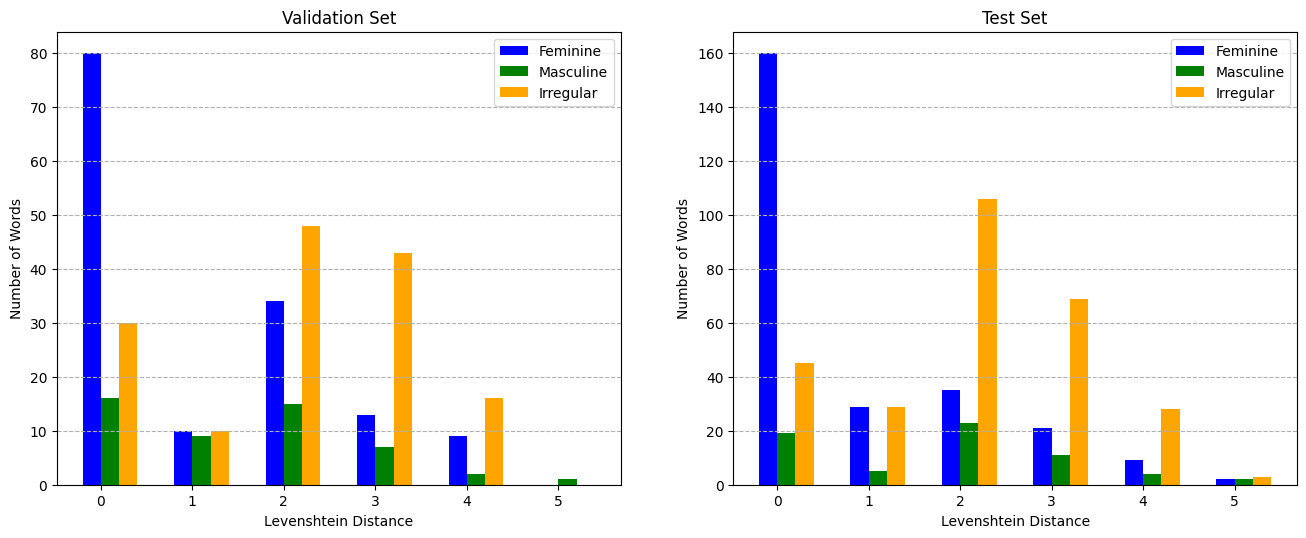

In [93]:
# plot a bar chart showing the distribution of the three classes in 
# distance value
plt.figure(figsize=(16, 6), dpi=100)

plt.subplot(1, 2, 1)
X = list(range(6))
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, valid_feminine_counts_list, 0.2, label = 'Feminine', color='blue') # plum
plt.bar(X_axis + 0.1, valid_masculine_counts_list, 0.2, label = 'Masculine', color='green') # steelblue
plt.bar(X_axis + 0.3, valid_takseer_counts_list, 0.2, label = 'Irregular', color='orange') # darkgray

  
plt.xticks(X_axis, X)
plt.xlabel("Levenshtein Distance")
plt.ylabel("Number of Words")
# plt.title("Number of Words in Each Distance Range")
plt.legend()
plt.grid(linestyle='dashed', axis='y')
plt.title('Validation Set')

plt.subplot(1, 2, 2)
X = list(range(6))
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, test_feminine_counts_list, 0.2, label = 'Feminine', color='blue')
plt.bar(X_axis + 0.1, test_masculine_counts_list, 0.2, label = 'Masculine', color='green')
plt.bar(X_axis + 0.3, test_takseer_counts_list, 0.2, label = 'Irregular', color='orange')

  
plt.xticks(X_axis, X)
plt.xlabel("Levenshtein Distance")
plt.ylabel("Number of Words")
# plt.title("Number of Words in Each Distance Range")
plt.legend()
plt.grid(linestyle='dashed', axis='y')
plt.title('Test Set')
plt.savefig('distance grouped by gender.png', dpi=100, bbox_inches='tight')

# Training Progress

In [94]:
# read the saved training progress dataset
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-Hmh01q3QrUWQYaGirDJqJ0w-jBK5HJA')
cols = df.columns.tolist()
# rename the columns
cols = ['Train Loss', 'Train Accuracy', 'Train Top 5 Accuracy',
        'Valid Loss', 'Valid Accuracy', 'Valid Top 5 Accuracy']
df.columns = cols
df

,Train Loss,Train Accuracy,Train Top 5 Accuracy,Valid Loss,Valid Accuracy,Valid Top 5 Accuracy
0,133.087745,0.059561,0.217868,4.527369,0.071998,0.209542
1,119.402622,0.084639,0.260972,5.136552,0.023244,0.202156
2,118.809530,0.096003,0.246082,5.127438,0.071947,0.242712
3,102.824297,0.139107,0.331897,5.043379,0.110622,0.290107
4,92.043885,0.158699,0.351881,5.024953,0.109689,0.326109
...,...,...,...,...,...,...
95,1.144705,0.581113,0.601097,5.713322,0.409236,0.551075
96,1.133310,0.581505,0.601097,5.716127,0.409758,0.551253
97,1.122079,0.581897,0.601097,5.722394,0.409581,0.551430
98,1.110998,0.582680,0.601097,5.725244,0.409758,0.551608


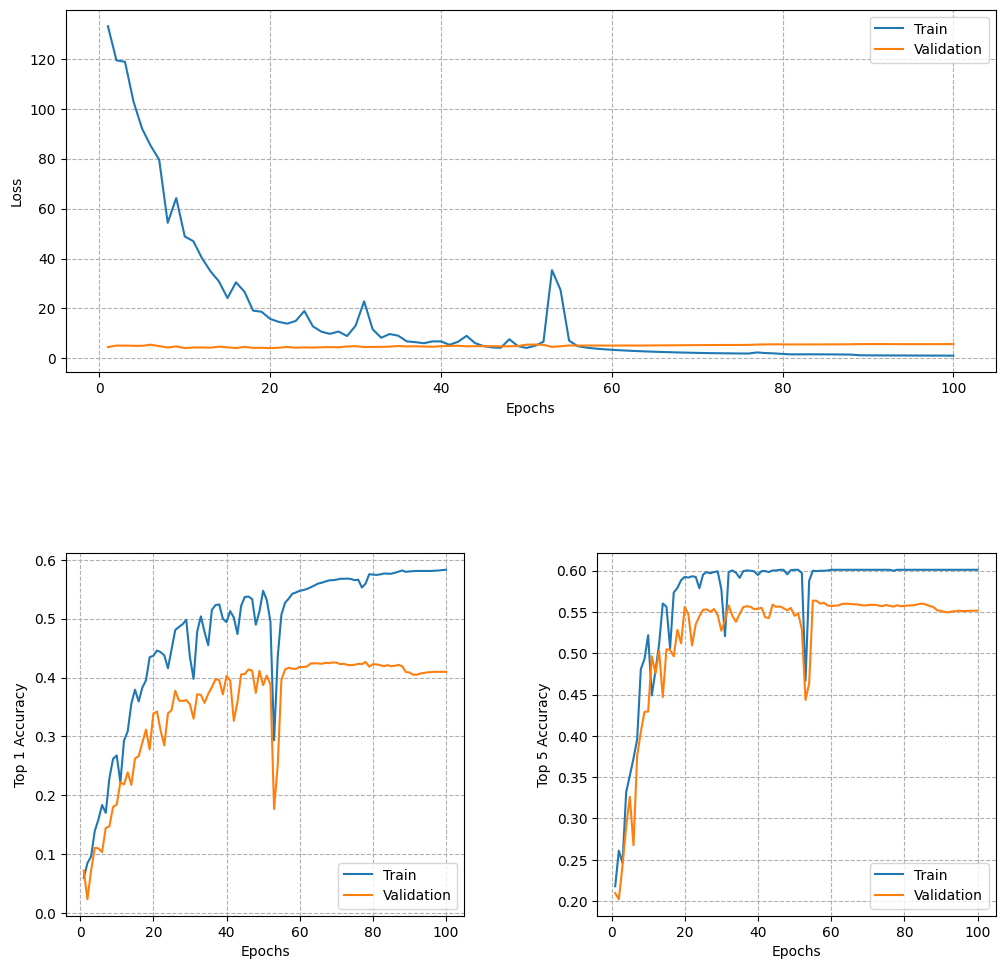

In [95]:
# plot loss vs epochs
plt.figure(figsize=(12, 12), dpi=100)
grid = plt.GridSpec(2, 4, wspace=1, hspace=0.5)
plt.subplot(grid[0, ::])
plt.plot(np.arange(1, 101), df['Train Loss'])
plt.plot(np.arange(1, 101), df['Valid Loss'])
plt.grid(linestyle='dashed')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplot(grid[1, :2])
# plot accuracy vs epochs
plt.plot(np.arange(1, 101), df['Train Accuracy'])
plt.plot(np.arange(1, 101), df['Valid Accuracy'])
plt.grid(linestyle='dashed')
plt.ylabel('Top 1 Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplot(grid[1, 2:])
# plot top 5 accuracy vs epochs
plt.plot(np.arange(1, 101), df['Train Top 5 Accuracy'])
plt.plot(np.arange(1, 101), df['Valid Top 5 Accuracy'])
plt.grid(linestyle='dashed')
plt.ylabel('Top 5 Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
# save figures
plt.savefig('metrics.png', dpi=100, bbox_inches='tight');